## Importando as Bibliotecas

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import pandas as pd 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Lendo o arquvio que representa as entradas 

In [36]:
X1=pd.read_csv('X_In.csv')
X1.head()

,G,F,E,D,C,B,A
0,4.231242,0.780309,4.730696,2.156199,0.645430,3.787909,2.969870
1,0.636853,2.024109,2.090387,2.159703,3.502169,2.557124,3.135354
2,2.986594,0.456140,0.779718,3.521068,2.736177,3.317250,2.819513
3,0.038345,4.963844,3.928005,2.248092,3.118439,2.997237,4.477473
4,0.161174,0.377934,0.603821,0.664421,3.294831,4.219109,0.200306


### Lendo o arquvio que representa as saídas 

In [37]:
Y1=pd.read_csv('Y_Out.csv')
Y1.head()

,D8,D4,D2,D1
0,0,0,1,0
1,0,0,0,0
2,1,0,0,1
3,0,0,0,0
4,0,0,0,1


### Separando o Conjunto para Treinamento e Teste da rede 

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X1,Y1,
    test_size=0.2, 
    random_state=36
)

x_train.head()

,G,F,E,D,C,B,A
1744,0.634871,0.260274,0.120369,0.213064,3.333546,2.240588,2.408543
2847,2.958249,0.404613,0.064944,4.754254,4.757221,2.512015,4.034577
2867,4.996156,0.426495,0.056511,4.424242,3.204069,2.337421,4.998118
1396,3.033935,2.065023,0.213739,0.216075,3.921903,2.030379,0.030073
1111,3.132424,3.741727,0.728984,0.339927,4.283104,4.537961,0.304483


In [41]:
print(X1.shape[1], Y1.shape[1])

7 4


## Criando o Modelo da Rede 

In [112]:
input_shape = X1.shape[1]   
output_shape = Y1.shape[1]  

mlp = Sequential([
    Dense(7, activation='sigmoid', input_shape=(input_shape,)),
    Dense(15, activation='sigmoid'),
    Dense(4,activation='sigmoid')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['acc']
)

mlp.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 7)                 56        
                                                                 
 dense_66 (Dense)            (None, 15)                120       
                                                                 
 dense_67 (Dense)            (None, 4)                 64        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


## Treinando o Modelo 

In [107]:
history = mlp.fit(
    x_train, y_train,
    batch_size=10,
    epochs=100,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/100
216/216 [==============================] - 1s 2ms/step - loss: 0.2297 - acc: 0.1741 - val_loss: 0.2181 - val_acc: 0.1250 - lr: 0.0010
Epoch 2/100
216/216 [==============================] - 0s 1ms/step - loss: 0.2128 - acc: 0.1199 - val_loss: 0.2073 - val_acc: 0.1333 - lr: 0.0010
Epoch 3/100
216/216 [==============================] - 0s 2ms/step - loss: 0.1998 - acc: 0.2366 - val_loss: 0.1917 - val_acc: 0.3375 - lr: 0.0010
Epoch 4/100
216/216 [==============================] - 0s 1ms/step - loss: 0.1833 - acc: 0.3648 - val_loss: 0.1744 - val_acc: 0.4125 - lr: 0.0010
Epoch 5/100
216/216 [==============================] - 0s 1ms/step - loss: 0.1686 - acc: 0.4042 - val_loss: 0.1624 - val_acc: 0.4083 - lr: 0.0010
Epoch 6/100
216/216 [==============================] - 0s 1ms/step - loss: 0.1573 - acc: 0.4227 - val_loss: 0.1525 - val_acc: 0.4333 - lr: 0.0010
Epoch 7/100
216/216 [==============================] - 0s 1ms/step - loss: 0.1484 - acc: 0.4287 - val_loss: 0.1451 - val_acc

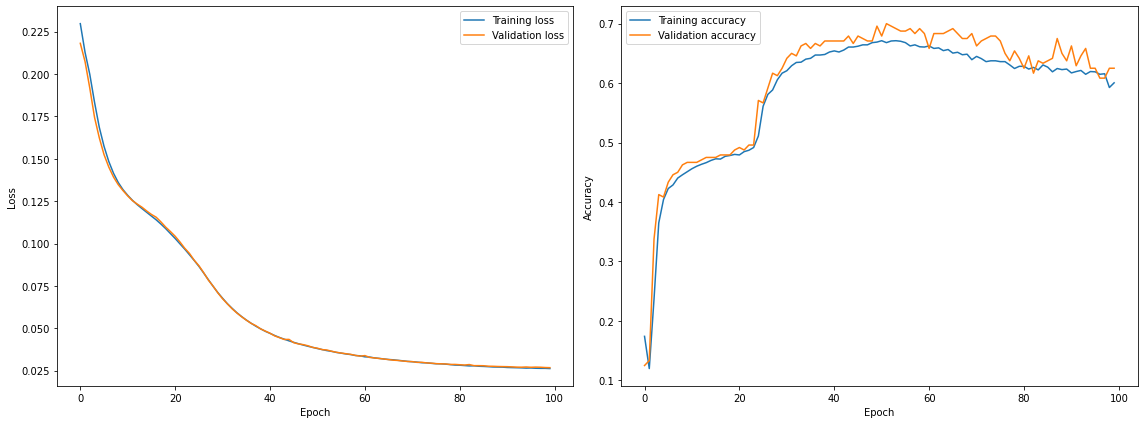

In [109]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')

ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(history.history['acc'], label='Training accuracy')
ax[1].plot(history.history['val_acc'], label='Validation accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [103]:
y_pred = mlp.predict(x_test)

19/19 [==============================] - 0s 1ms/step


In [105]:
print(y_pred)

print(x_test)

[[0.14793171 0.0250759  0.9607418  0.00272747]
 [0.10436177 0.02550427 0.95823455 0.01062392]
 [0.6344394  0.12158914 0.16576159 0.00520327]
 ...
 [0.3466151  0.80314577 0.6748118  0.00369336]
 [0.02425469 0.8572127  0.00560403 0.09944608]
 [0.04011975 0.9284657  0.01016159 0.06781633]]
             G         F         E         D         C         B         A
2135  4.582049  0.546295  3.554080  4.041681  0.763788  3.830406  3.196891
2546  4.851881  0.045558  2.524858  4.030377  0.167157  2.716222  4.301985
1770  3.391687  3.963930  2.862051  2.055121  2.306702  2.463744  2.649827
2857  2.650276  0.480317  0.283201  4.158121  2.100267  2.180956  3.949292
1536  0.538997  3.178729  4.670470  4.969411  3.949452  4.900323  4.747966
...        ...       ...       ...       ...       ...       ...       ...
2341  4.296062  0.671198  0.122849  2.953110  2.434710  4.898999  3.603755
2351  0.111083  0.472642  0.333171  0.222777  2.756376  3.661847  2.145304
2926  4.208938  3.618692  4.966333  3